In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("data.csv")
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [3]:
df = df.drop(['Unnamed: 32'],axis=1)

In [4]:
df['diagnosis'] = df['diagnosis'].map({'B':0,'M':1})
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [5]:
df['diagnosis'].value_counts(normalize=True)

0    0.627417
1    0.372583
Name: diagnosis, dtype: float64

In [6]:
X = df.drop('diagnosis', axis=1).values
y = df['diagnosis'].values

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")
sns.countplot(y=y, data=df, palette="mako_r")
plt.title("Result before oversampling")
plt.ylabel('Loan Status')
plt.xlabel('Total')
plt.show()

from imblearn.over_sampling import SMOTE, ADASYN, SVMSMOTE
from imblearn.combine import SMOTETomek,SMOTEENN
from imblearn.under_sampling import NearMiss
nm = SMOTE()
X, y = nm.fit_resample(X, y)

sns.set_theme(style="darkgrid")
sns.countplot(y=y, data=df, palette="mako_r")
plt.title("Result after oversampling")
plt.ylabel('Loan Status')
plt.xlabel('Total')
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify=y)
n_cols = X_train.shape[1]

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

In [11]:
# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw
model = Sequential()
model.add(Dense(50, activation = 'relu', input_shape=(n_cols,)))
model.add(BatchNormalization())
model.add(Dropout(.2))

model.add(Dense(25, activation = 'relu',))
model.add(BatchNormalization())
model.add(Dropout(.2))

model.add(Dense(11, activation = 'relu',))
model.add(BatchNormalization())
model.add(Dropout(.2))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
early_stop = EarlyStopping(monitor='val_loss', patience=6, mode='min')

In [13]:
result = model.fit(X_train, y_train, 
          epochs=100, 
          batch_size=128, 
          validation_data=(X_test,y_test),
          callbacks=[early_stop])

Epoch 1/100
5/5 [==============================] - 1s 56ms/step - loss: 0.7465 - accuracy: 0.5534 - val_loss: 0.6929 - val_accuracy: 0.4965
Epoch 2/100
5/5 [==============================] - 0s 12ms/step - loss: 0.6119 - accuracy: 0.6743 - val_loss: 0.6916 - val_accuracy: 0.5245
Epoch 3/100
5/5 [==============================] - 0s 21ms/step - loss: 0.5309 - accuracy: 0.7688 - val_loss: 0.6943 - val_accuracy: 0.5035
Epoch 4/100
5/5 [==============================] - 0s 24ms/step - loss: 0.4661 - accuracy: 0.8231 - val_loss: 0.6949 - val_accuracy: 0.5035
Epoch 5/100
5/5 [==============================] - 0s 22ms/step - loss: 0.4444 - accuracy: 0.8529 - val_loss: 0.6940 - val_accuracy: 0.5035
Epoch 6/100
5/5 [==============================] - 0s 23ms/step - loss: 0.4230 - accuracy: 0.8599 - val_loss: 0.6925 - val_accuracy: 0.5035
Epoch 7/100
5/5 [==============================] - 0s 24ms/step - loss: 0.3669 - accuracy: 0.8932 - val_loss: 0.6906 - val_accuracy: 0.5035
Epoch 8/100
5/5 [===

In [14]:
loss_df = pd.DataFrame(model.history.history)

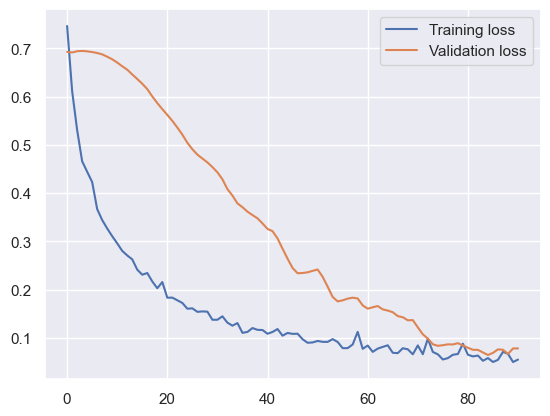

In [15]:
plt.plot(loss_df['loss'], label='Training loss')
plt.plot(loss_df['val_loss'], label='Validation loss')
plt.legend()

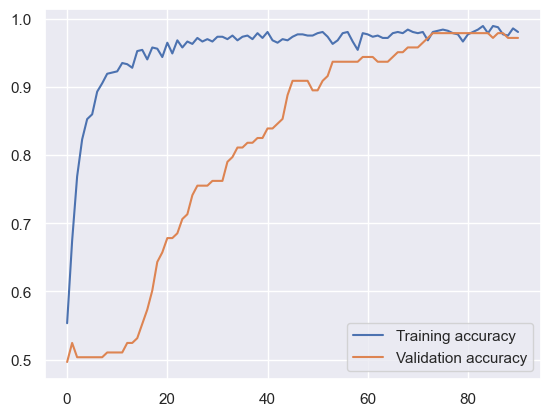

In [16]:
plt.plot(loss_df['accuracy'], label='Training accuracy')
plt.plot(loss_df['val_accuracy'], label='Validation accuracy')
plt.legend()

In [17]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [18]:
y_pred = model.predict(X_test)
y_pred = y_pred.round()

5/5 [==============================] - 0s 6ms/step


In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97        71
           1       0.96      0.99      0.97        72

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

